#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得 Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對 Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### binary crossentropy

In [22]:
import time

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [24]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
start = time.time()
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.25,
                          epochs = 10, batch_size = 16, verbose = 1)         

# [validation_split = 0.2] validation_split：在 0 和 1 之間浮動。用作驗證數據的訓練數據的分數。
# 該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
# [batch_size]：整數或 None。每個梯度更新的樣本數。指定，batch_size為128。
# 但是參考範例解答，這邊使用較小的 batch size 似乎有比較好的結果
print(f'running time: {(time.time() - start) / 60}')

Epoch 1/10
2344/2344 [==============================] - 282s 120ms/step - loss: 0.3086 - accuracy: 0.2061 - val_loss: 0.2957 - val_accuracy: 0.3030
Epoch 2/10
2344/2344 [==============================] - 269s 115ms/step - loss: 0.2827 - accuracy: 0.3067 - val_loss: 0.2809 - val_accuracy: 0.3650
Epoch 3/10
2344/2344 [==============================] - 312s 133ms/step - loss: 0.2670 - accuracy: 0.3631 - val_loss: 0.2687 - val_accuracy: 0.3930
Epoch 4/10
2344/2344 [==============================] - 339s 144ms/step - loss: 0.2542 - accuracy: 0.3970 - val_loss: 0.2562 - val_accuracy: 0.4340
Epoch 5/10
2344/2344 [==============================] - 270s 115ms/step - loss: 0.2450 - accuracy: 0.4223 - val_loss: 0.2496 - val_accuracy: 0.4484
Epoch 6/10
2344/2344 [==============================] - 269s 115ms/step - loss: 0.2382 - accuracy: 0.4406 - val_loss: 0.2425 - val_accuracy: 0.4654
Epoch 7/10
2344/2344 [==============================] - 277s 118ms/step - loss: 0.2320 - accuracy: 0.4558 - val_

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

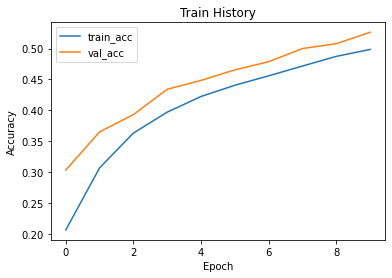

In [26]:
show_train_history('accuracy','val_accuracy')

### MSE

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
start = time.time()
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split = 0.25,
                          epochs = 12, batch_size = 16, verbose = 1)         

#[validation_split = 0.2] validation_split：在 0 和 1 之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或 None。每個梯度更新的樣本數。指定，batch_size為128
print(f'running time: {(time.time() - start) / 60}')

Epoch 1/12
293/293 [==============================] - 183s 625ms/step - loss: 0.0629 - accuracy: 0.5090 - val_loss: 0.0651 - val_accuracy: 0.5330
Epoch 2/12
293/293 [==============================] - 187s 639ms/step - loss: 0.0627 - accuracy: 0.5112 - val_loss: 0.0649 - val_accuracy: 0.5315
Epoch 3/12
293/293 [==============================] - 178s 608ms/step - loss: 0.0625 - accuracy: 0.5130 - val_loss: 0.0649 - val_accuracy: 0.5310
Epoch 4/12
293/293 [==============================] - 196s 668ms/step - loss: 0.0624 - accuracy: 0.5141 - val_loss: 0.0648 - val_accuracy: 0.5329
Epoch 5/12
293/293 [==============================] - 178s 606ms/step - loss: 0.0625 - accuracy: 0.5117 - val_loss: 0.0647 - val_accuracy: 0.5317
Epoch 6/12
235/293 [=======================>......] - ETA: 4:24:38 - loss: 0.0627 - accuracy: 0.5109

In [ ]:
show_train_history('accuracy','val_accuracy')